In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the data

train_path = "/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv"
test_path = "/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

## EDA - Exploratory Data Analysis

In [4]:
# Checking the dimentions to know about number of rows and columns of the dataset 

print(train.shape)
print(test.shape)

(116023, 52)
(29006, 51)


In [5]:
train.head(n=7)   

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0
5,True,28000000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,48,not available in demo dataset,1505506252,Americas,False,NaN
6,NaN,80510000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,17,not available in demo dataset,1472053897,Americas,False,1.0


In [6]:
# to have an overall idea about the columns, their datatypes and amount of null values present inside 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

There are 37 Categorical Columns,14 integer columns and 1 boolean column However columns like userId , sessionId ,sessionStart, date are being assigned a wrong datatype ideally userId,sessionId,sessionStart should be categorical date should be datetime.

In [7]:
# Looking at the measures of central tendency and measures of dispertion for the relevant numerical columns
# userId,sessionId,sessionStart have not been included as they are actually categorical

relevant_num = ['totalHits','totals.bounces','pageViews','totals.visits','purchaseValue','trafficSource.adwordsClickInfo.page','sessionNumber','new_visits','locationZone','gclIdPresent']
train[relevant_num].describe().round(2)

,totalHits,totals.bounces,pageViews,totals.visits,purchaseValue,trafficSource.adwordsClickInfo.page,sessionNumber,new_visits,locationZone,gclIdPresent
count,116023.00,47148.0,116015.00,116023.0,1.160230e+05,4281.00,116023.00,80518.0,116023.0,116023.00
mean,10.61,1.0,8.41,1.0,2.656393e+07,1.02,2.69,1.0,8.0,0.04
std,19.63,0.0,14.34,0.0,2.051825e+08,0.17,10.45,0.0,0.0,0.19
min,1.00,1.0,1.00,1.0,0.000000e+00,1.00,1.00,1.0,8.0,0.00
25%,1.00,1.0,1.00,1.0,0.000000e+00,1.00,1.00,1.0,8.0,0.00
50%,2.00,1.0,2.00,1.0,0.000000e+00,1.00,1.00,1.0,8.0,0.00
75%,12.00,1.0,10.00,1.0,0.000000e+00,1.00,2.00,1.0,8.0,0.00
max,500.00,1.0,469.00,1.0,2.312950e+10,5.00,447.00,1.0,8.0,1.00


totals.visits is a constant numerical column also the locationZone so we can't find any relevant information from it gclId seems to be a 0,1 value

sessionNumber is the Number of session that varies from 1 to 447

totals.bounces also have std 0 but there are null values so that should be taken care of when we handle missing values

purchase value is a  zero-inflated distribution as we can see the 75th percentile is also 0

In [8]:
# checking the percentage of rows having purchaseValue grater than zero 

non_zero_rows=train[train['purchaseValue']>0].shape[0]
print("Number of non-zero(purchaseValue) rows",non_zero_rows,sep='-')
print("Percentage of total rows" ,(non_zero_rows/train.shape[0])*100,sep='-')

Number of non-zero(purchaseValue) rows-23985
Percentage of total rows-20.672625255337305


Here we can see that only ~20% values are non-zero.

## Numerical Columns

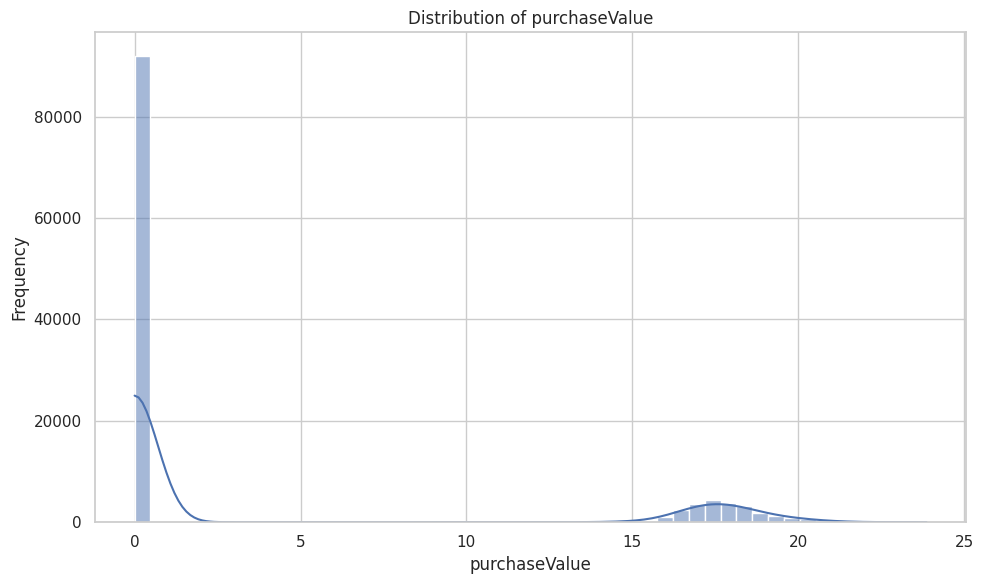

In [9]:
# Histogram of purchaseValue to understand the overall distribution

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train['purchaseValue']), bins=50, kde=True)
plt.title('Distribution of purchaseValue')
plt.xlabel('purchaseValue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

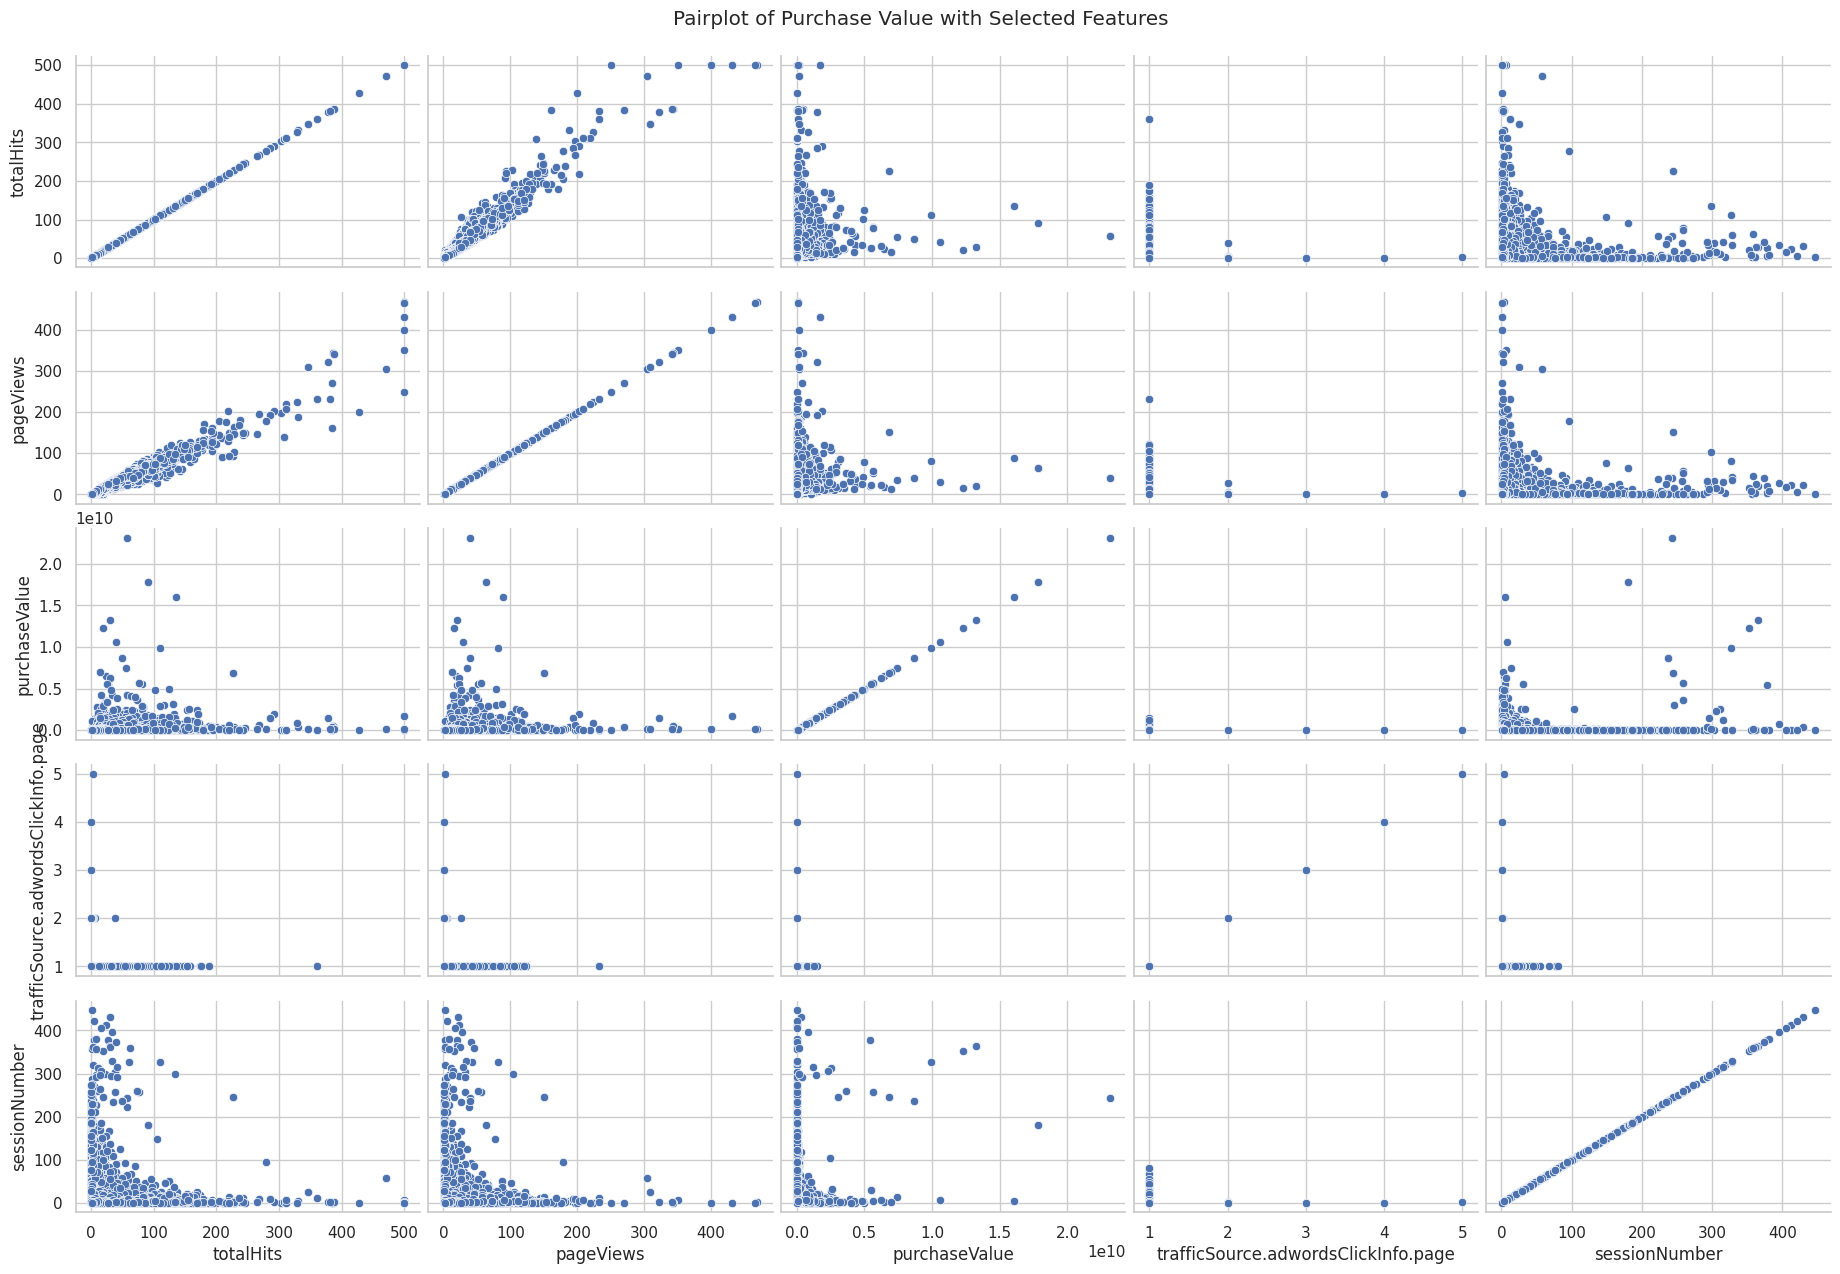

In [10]:
# pairplots of relevant numerical columns to understand relation between them

pairplot_relevant = ['totalHits','pageViews','purchaseValue','trafficSource.adwordsClickInfo.page','sessionNumber']

sns.pairplot(train[pairplot_relevant],aspect=1.5,diag_kind=None)
plt.suptitle("Pairplot of Purchase Value with Selected Features", y=1.02)
plt.show()

We can see that totalHits and pageViews are having relationship.
other than that any column doesnt have a significant relationship with any other column or the purchasevalue column

### Summary 

pageViews and totalHits are related to each other.

No numerical column have a clear,noticable relationship with target.

purchaseValue is skewed and around 80% of purchaseValue is 0.

## Categorical Columns

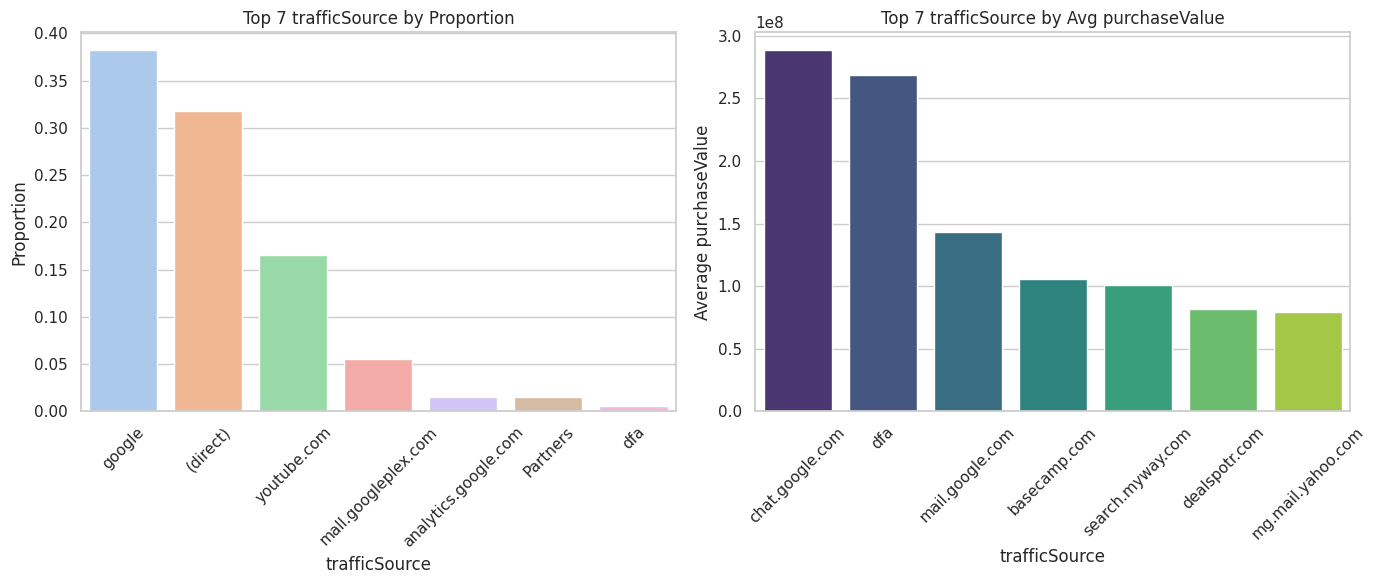

Number of unique values in 'trafficSource': 161


In [11]:
def plot_categorical_analysis(train, col, target='purchaseValue', top_n=7):
    
    
    counts = train[col].value_counts(normalize=True).head(top_n).reset_index()
    counts.columns = [col, 'proportion']
    
    avg = train.groupby(col)[target].mean().reset_index()
    avg = avg.sort_values(by=target, ascending=False).head(top_n)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.barplot(data=counts, x=col, y='proportion', ax=axes[0], palette='pastel')
    axes[0].set_title(f'Top {top_n} {col} by Proportion')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Proportion')
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(data=avg, x=col, y=target, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Top {top_n} {col} by Avg {target}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel(f'Average {target}')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
    
    print(f"Number of unique values in '{col}': {train[col].nunique()}")



plot_categorical_analysis(train, 'trafficSource', target='purchaseValue', top_n=7)


In [12]:
#Looking at the frequency of the categories having highest avg purchasevalue

print(train[train['trafficSource']=='chat.google.com'].shape)

(6, 52)


Above results show that the rare frequency categories are having high impact on the purchaseValue as the 'chat.google.com' only appears for 6 times still it has the highest avg purchase value.

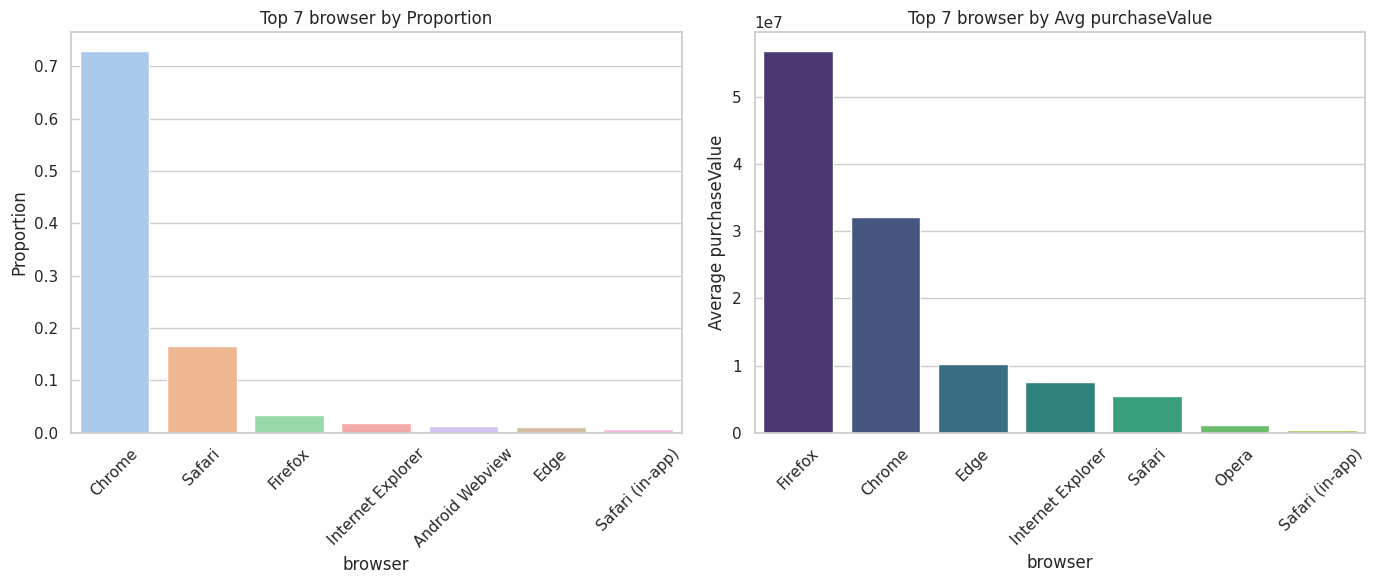

Number of unique values in 'browser': 34


In [13]:
plot_categorical_analysis(train, 'browser', target='purchaseValue', top_n=7)

Chrome is the most used browser while Firefox is the browser which gives the highest avg purchaseValue

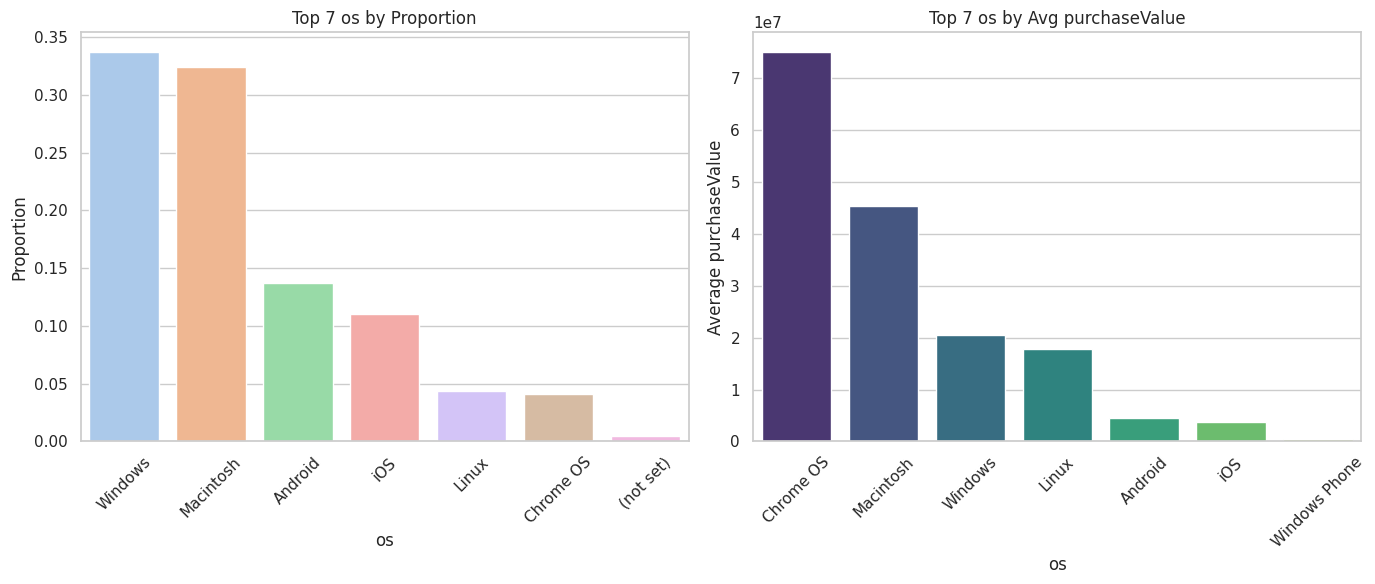

Number of unique values in 'os': 18


In [14]:
plot_categorical_analysis(train, 'os', target='purchaseValue', top_n=7)

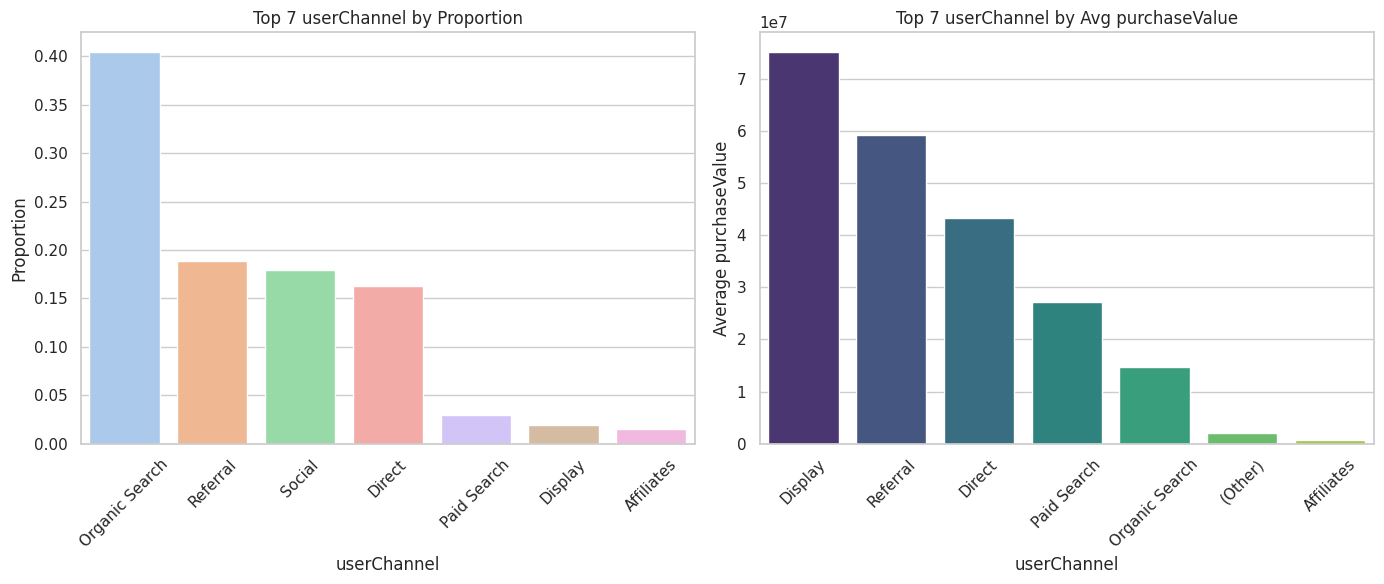

Number of unique values in 'userChannel': 8


In [15]:
plot_categorical_analysis(train, 'userChannel', target='purchaseValue', top_n=7)

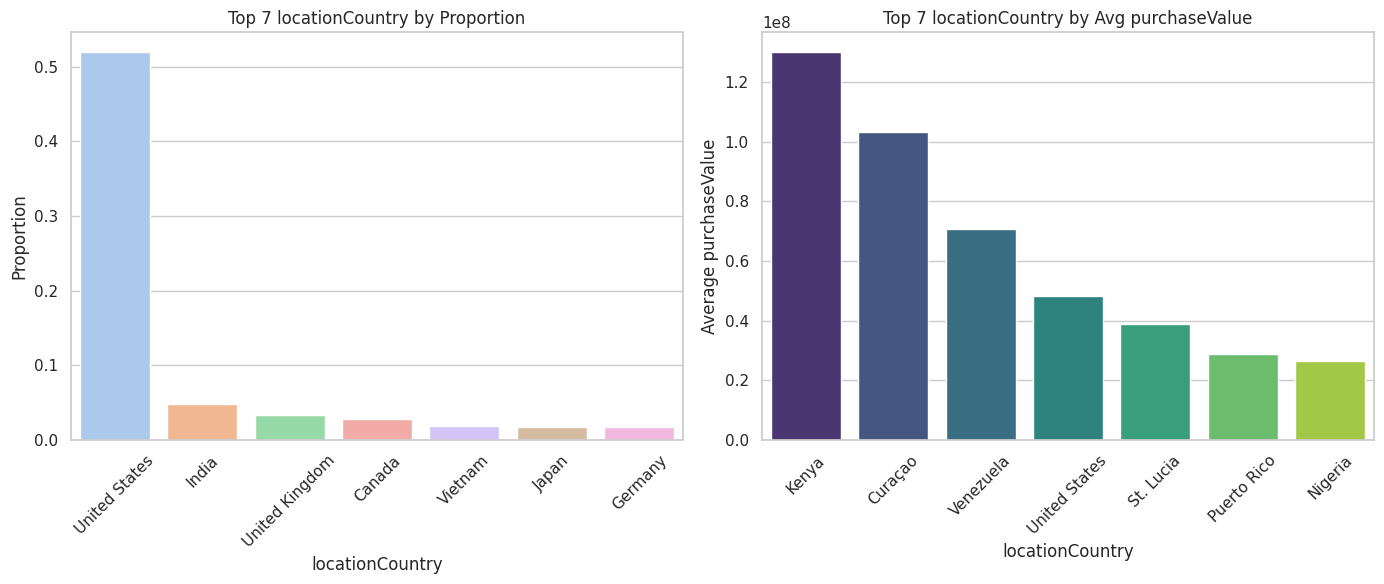

Number of unique values in 'locationCountry': 193


In [16]:
plot_categorical_analysis(train, 'locationCountry', target='purchaseValue', top_n=7)

while geoCluster Network Domain and geoCluster showed equal distribution

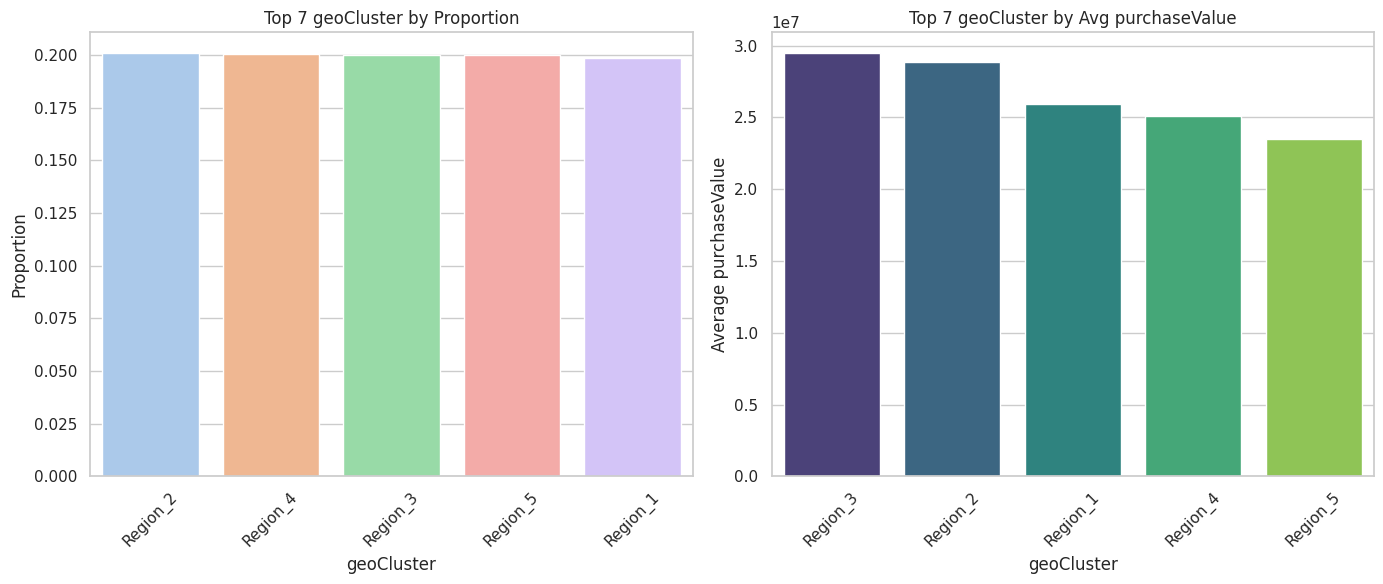

Number of unique values in 'geoCluster': 5


In [17]:
plot_categorical_analysis(train, 'geoCluster', target='purchaseValue', top_n=7)

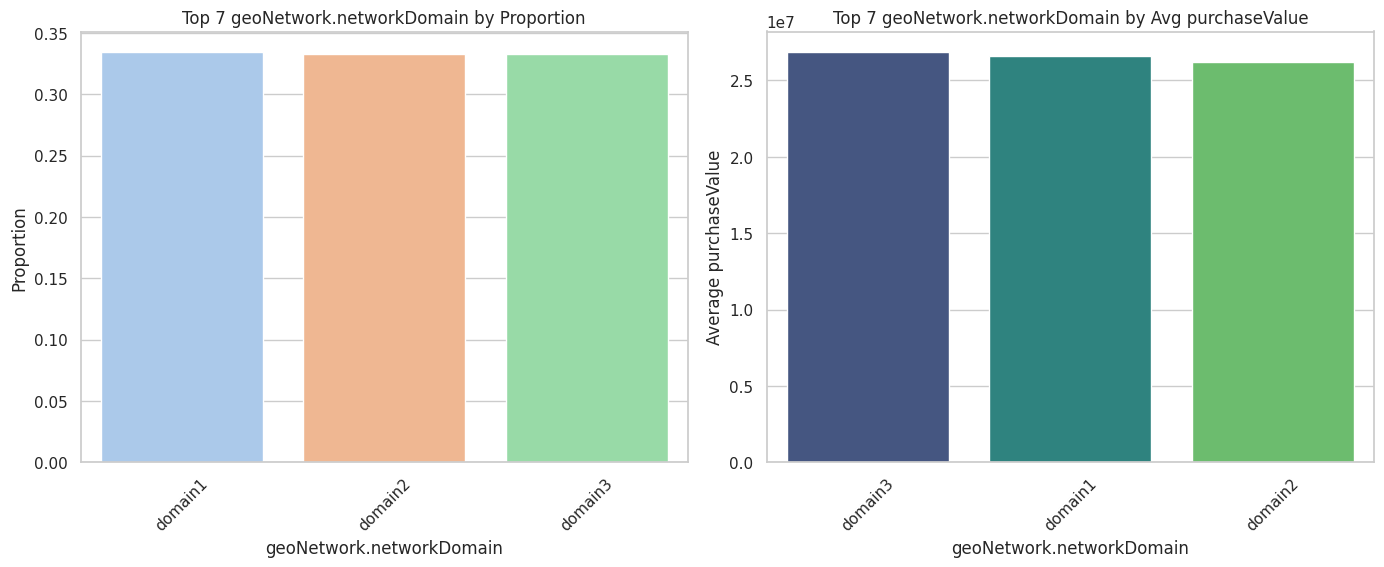

Number of unique values in 'geoNetwork.networkDomain': 3


In [18]:
plot_categorical_analysis(train, 'geoNetwork.networkDomain', target='purchaseValue', top_n=7)

these two columns were having there categories divided in equal distributions 
nwtworkdomain have almost the same avg purchasevalue and geocluset showed some fluctuations

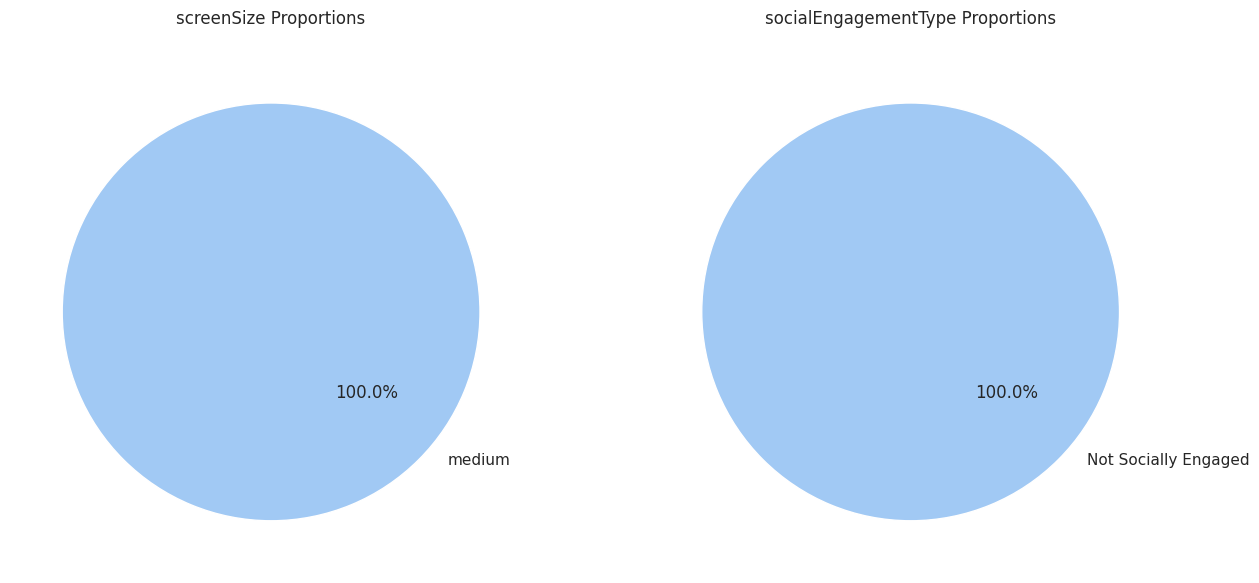

Number of Unique values: 1


In [19]:
col1 = 'screenSize'
col2 = 'socialEngagementType'

counts1 = train[col1].value_counts(normalize=True).reset_index()
counts1.columns = [col1, 'proportion']

counts2 = train[col2].value_counts(normalize=True).reset_index()
counts2.columns = [col2, 'proportion']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(counts1['proportion'], labels=counts1[col1], autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette('pastel'))
axes[0].set_title(f'{col1} Proportions', pad=20)

axes[1].pie(counts2['proportion'], labels=counts2[col2], autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title(f'{col2} Proportions', pad=20)

plt.tight_layout()
plt.show()

print("Number of Unique values:", len(train[col1].value_counts()))

Columns like screenSize(medium) social engangement type(not socially engaged) had only single values 

In [20]:
col = 'device.screenResolution'

train[col].value_counts()

device.screenResolution
not available in demo dataset    116023
Name: count, dtype: int64

In [21]:
one_unique_na_cols = []

for col in train.columns:
    unique_vals = train[col].dropna().unique()
    if len(unique_vals) == 1 and unique_vals[0] == 'not available in demo dataset':
        one_unique_na_cols.append(col)
        
print(one_unique_na_cols)
print(len(one_unique_na_cols))

['device.screenResolution', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']
13


there are 13 columns like this in the dataset which have value "not available in demo dataset" for all the rows that is an important insight for us as these columns doesnt provide any insights and it can reduce dimention

## Categorical + Numerical  and More insights

## Summary 

There are a lot of columns where rare categories are really important as they capture some noise so grouping them can have a chance of diluting the signal coming from rare categories and thus we need to use efficient methods to make sure we capture the noise.
There are 13 categorical columns having the singular value "not available in demo dataset".
Some columns only had one constant value.

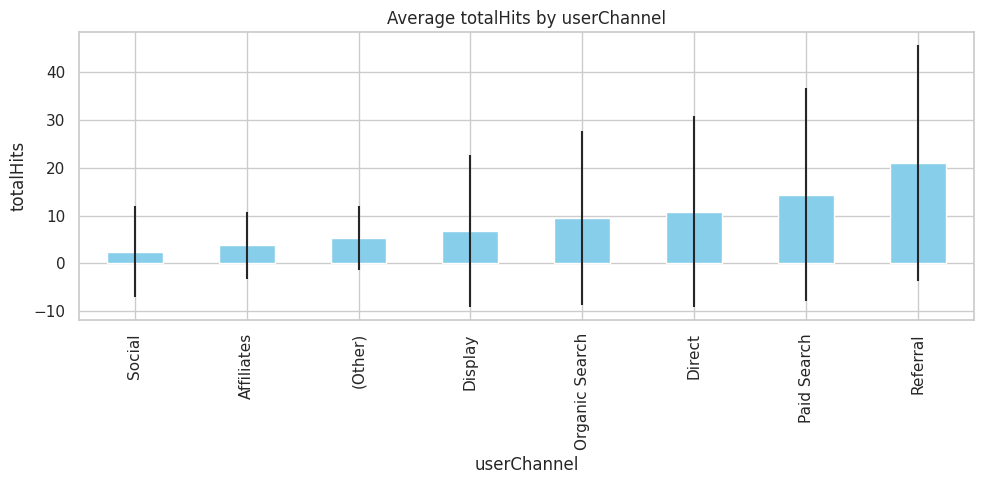

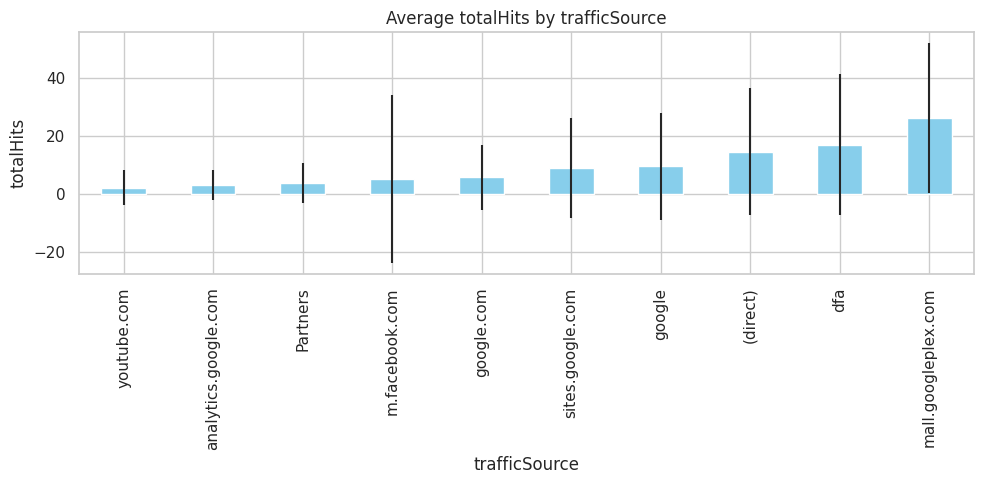

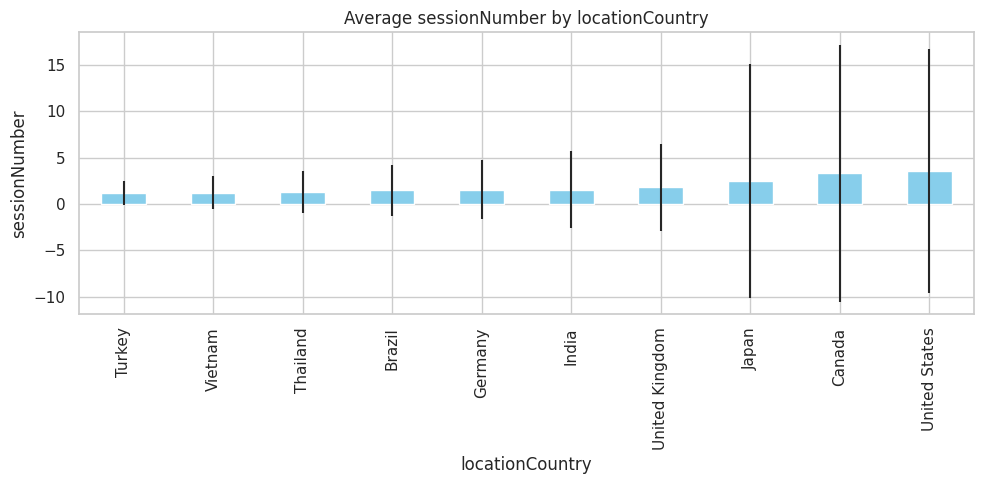

In [22]:
# To understand the traffic (PageViews-totalHits-sessionNumber) with categorical columns

def grouped_barplot(num_col, cat_col, top_n=10):
    top_cats = train[cat_col].value_counts().head(top_n).index
    df_plot = train[train[cat_col].isin(top_cats)].groupby(cat_col)[num_col].agg(['mean', 'std']).sort_values('mean')
    
    df_plot.plot(kind='bar', y='mean', yerr='std', figsize=(10,5), legend=False, color='skyblue')
    plt.ylabel(num_col)
    plt.title(f'Average {num_col} by {cat_col}')
    plt.tight_layout()
    plt.show()

#which userChannel and TrafficSource or country are giving more traffic 

grouped_barplot('totalHits','userChannel')
grouped_barplot('totalHits','trafficSource')
grouped_barplot('sessionNumber','locationCountry')

From userChannel Referral there were most number of hits and most number of repeated users were from United States,Canada and Japan

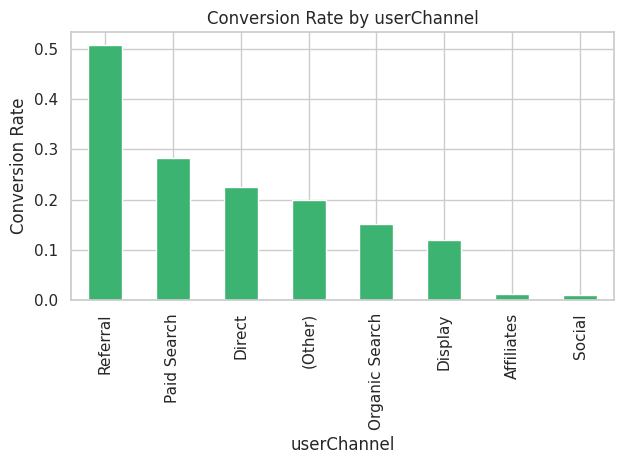

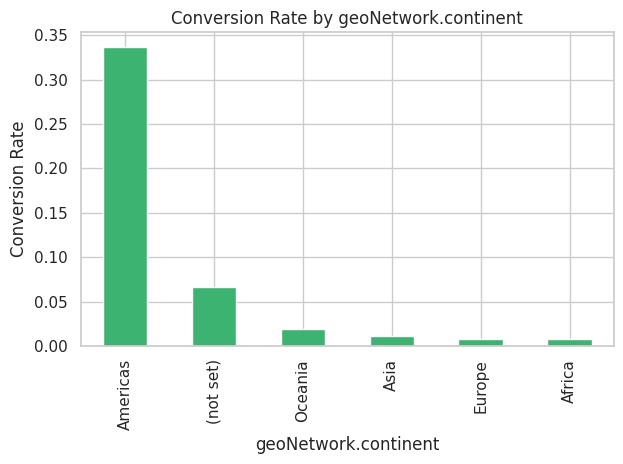

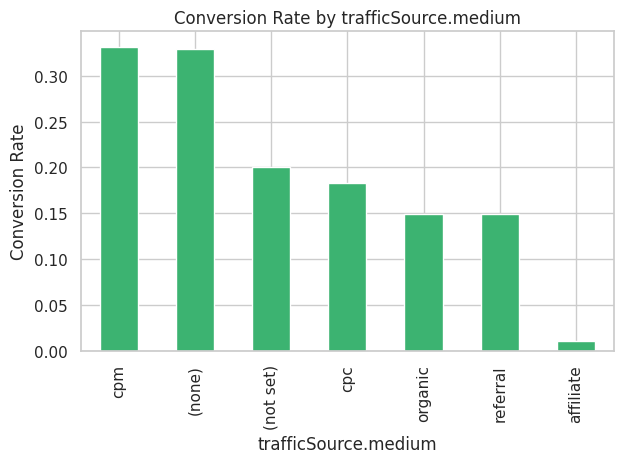

In [23]:
#to understand conversion rates across some imp categories

def conversion_rate_by_cat(df, cat_col):
    df['converted'] = (df['purchaseValue'] > 0).astype(int)
    conv_rate = df.groupby(cat_col)['converted'].mean().sort_values(ascending=False)
    conv_rate.head(12).plot(kind='bar', color='mediumseagreen')
    plt.title(f'Conversion Rate by {cat_col}')
    plt.ylabel('Conversion Rate')
    plt.tight_layout()
    plt.show()

conversion_rate_by_cat(train,'userChannel')
conversion_rate_by_cat(train,'geoNetwork.continent')
conversion_rate_by_cat(train,'trafficSource.medium')

cpm--Display Ads Banner Ads has the highest conversion rate

userChannel-Referral bringing most number of hits and also the highest conversion rate amongst all the userChannels

cpc	Cost per click —> Paid ads (Google Ads, Facebook Ads, etc.)

cpm	Cost per mille (i.e., 1000 impressions) —>Display ads, banner ads

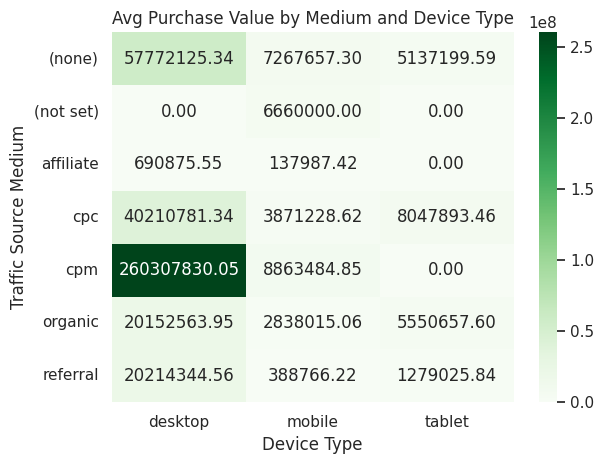

In [24]:
pivot = train.pivot_table(
    values='purchaseValue',
    index='trafficSource.medium',
    columns='deviceType',
    aggfunc='mean'
)


sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Greens')
plt.title("Avg Purchase Value by Medium and Device Type")
plt.xlabel("Device Type")
plt.ylabel("Traffic Source Medium")
plt.tight_layout()
plt.show()

Summary 

UserChannel Referral being the most effective channel

cpm(Paid ads) is the medium with the highest conversion rate

Desktop users are more than any other device and they are bringing relatively higher purchaseValue

In [25]:
train.drop(columns=['converted'],inplace=True)

## Missing Value Analysis and Imputation

In [26]:
train.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

We can see that 10 columns have null values

In [27]:
#To make sure that we are not counting anything more than one time let's delete the duplicate values first 

train = train.drop_duplicates()

In [28]:
null_report = train.isnull().sum()
null_report = null_report[null_report > 0].sort_values(ascending=False)
null_df = pd.DataFrame({
    'Missing': (null_report / len(train) * 100).round(2)
})
print(null_df)

                                              Missing
trafficSource.adContent                         97.44
trafficSource.adwordsClickInfo.slot             96.31
trafficSource.adwordsClickInfo.isVideoAd        96.31
trafficSource.adwordsClickInfo.adNetworkType    96.31
trafficSource.adwordsClickInfo.page             96.31
trafficSource.referralPath                      63.13
trafficSource.isTrueDirect                      63.09
trafficSource.keyword                           61.95
totals.bounces                                  59.30
new_visits                                      30.57
pageViews                                        0.01


The 5 columns with more than 95% values is visible it will be better for now to drop those columns as they can't provide more information.

## Imputation

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [30]:
train['pageViews'].value_counts()

pageViews
1.0      47345
2.0      14145
3.0       7622
4.0       4770
5.0       3508
         ...  
196.0        1
197.0        1
351.0        1
188.0        1
233.0        1
Name: count, Length: 175, dtype: int64

In [31]:
train["is_train"] = 1
test["is_train"] = 0
test["purchaseValue"] = np.nan

full = pd.concat([train, test], axis=0, ignore_index=True)


cols_to_drop = full.columns[full.isnull().mean() > 0.95].tolist()

full.drop(columns=cols_to_drop, inplace=True, errors='ignore')

target = full.loc[full["is_train"] == 1, "purchaseValue"].copy()
full.drop(columns=["purchaseValue"], inplace=True, errors='ignore')

fill_zero= ['totals.bounces', 'new_visits']
fill_false= ['trafficSource.isTrueDirect']
fill_mean = ['pageViews']
fill_notset = ['trafficSource.keyword','trafficSource.referralPath']


zero_imputer = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)),
    ('to_int', FunctionTransformer(lambda x: x.astype(int), feature_names_out='one-to-one'))
])

false_imputer = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='False')),
    ('to_bool', FunctionTransformer(lambda x: (x == 'True').astype(int), feature_names_out='one-to-one'))
])

mean_imputer = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('to_int', FunctionTransformer(lambda x: x.astype(int), feature_names_out='one-to-one'))
])

notset_imputer = Pipeline(
    [('impute',SimpleImputer(strategy='constant',fill_value='not_set'))]
)

preprocessor = ColumnTransformer(transformers=[
    ('zero', zero_imputer, fill_zero),
    ('false', false_imputer, fill_false),
    ('mean', mean_imputer, fill_mean),
    ('not_set',notset_imputer,fill_notset)
], remainder='passthrough', verbose_feature_names_out=False)

full_imputed = pd.DataFrame(
    preprocessor.fit_transform(full),
    columns=preprocessor.get_feature_names_out()
)

In [32]:
train_imputed = full_imputed[full["is_train"] == 1].reset_index(drop=True)
test_imputed = full_imputed[full["is_train"] == 0].reset_index(drop=True)

In [33]:
train_imputed.isnull().sum()

totals.bounces                      0
new_visits                          0
trafficSource.isTrueDirect          0
pageViews                           0
trafficSource.keyword               0
trafficSource.referralPath          0
browser                             0
device.screenResolution             0
screenSize                          0
geoCluster                          0
device.mobileDeviceBranding         0
device.mobileInputSelector          0
userId                              0
trafficSource.campaign              0
device.mobileDeviceMarketingName    0
geoNetwork.networkDomain            0
gclIdPresent                        0
device.operatingSystemVersion       0
sessionNumber                       0
device.flashVersion                 0
geoNetwork.region                   0
trafficSource                       0
totals.visits                       0
geoNetwork.networkLocation          0
sessionId                           0
os                                  0
geoNetwork.s

## Feature Engineering and Preprocessing

First dropping the unnecessary columns (columns having constant values or having value as "not available in demo dataset)

In [34]:
constant_cols = [col for col in train_imputed.columns if train[col].nunique(dropna=False) == 1]
train_imputed.drop(columns=constant_cols, inplace=True)
test_imputed.drop(columns=constant_cols, inplace=True)

In [35]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder


As we stated before the userId , sessionId are categorical columns.created aggregated columns (based on date-time,average purchaseValue,totalHits,pageViews etc) for model to understand those better

From Sessionstart which is the timestamp when the session has started the useful date 

In [36]:
#Feature engineering function to add some useful features 

def feature_engineering(df):
    df = df.copy()

    if 'sessionStart' in df.columns:
        df['sessionStart_dt'] = pd.to_datetime(df['sessionStart'], unit='s', errors='coerce')
        df['session_year'] = df['sessionStart_dt'].dt.year
        df['session_month'] = df['sessionStart_dt'].dt.month
        df['session_day'] = df['sessionStart_dt'].dt.day
        df['session_hour'] = df['sessionStart_dt'].dt.hour
        df['session_dayofweek'] = df['sessionStart_dt'].dt.dayofweek
        df['session_weekofyear'] = df['sessionStart_dt'].dt.isocalendar().week
        df['is_weekend'] = df['session_dayofweek'].isin([5, 6]).astype(int)
        df['session_daypart'] = pd.cut(df['session_hour'],
                                       bins=[0, 6, 12, 18, 24],
                                       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                       right=False)
        df.drop(columns=['sessionStart_dt', 'date'], errors='ignore', inplace=True)

    if 'userId' in df.columns:
        agg_cols = [col for col in ['sessionNumber', 'totals.visits', 'totalHits', 'pageViews',
                                    'totals.bounces', 'new_visits'] if col in df.columns]
        user_agg = df.groupby('userId')[agg_cols].agg(['mean', 'sum', 'max', 'count'])
        user_agg.columns = ['user_' + '_'.join(col) for col in user_agg.columns]
        user_agg.reset_index(inplace=True)
        df = df.merge(user_agg, on='userId', how='left')
        df.drop(columns=['userId'], inplace=True)

    if 'sessionId' in df.columns:
        session_agg = df.groupby('sessionId').agg({
            'pageViews': ['sum', 'mean', 'count', 'max'],
            'totalHits': ['sum', 'mean', 'max'],
            'totals.bounces': ['sum'],
            'new_visits': ['sum']
        })
        session_agg.columns = ['session_' + '_'.join(col) for col in session_agg.columns]
        session_agg.reset_index(inplace=True)
        df = df.merge(session_agg, on='sessionId', how='left')
        df.drop(columns=['sessionId'], inplace=True)

    df['is_bounced'] = (df['totals.bounces'] == 1).astype(int)
    df['avg_hit_per_page'] = df['totalHits'] / (df['pageViews'] + 1e-5)
    df['page_to_hit_ratio'] = df['pageViews'] / (df['totalHits'] + 1e-5)
    df['is_first_session'] = (df['sessionNumber'] == 1).astype(int)
    df['repeat_user'] = (df['sessionNumber'] > 1).astype(int)
    df['interaction_score'] = df['pageViews'] + df['totalHits'] - 2 * df['is_bounced']

    return df

In [37]:
# Target encoder defined here to use it later  

def target_encoding(train_df, test_df, target, cat_cols, smoothing=30, min_samples_leaf=20, n_splits=5):
    train_df = train_df.copy()
    test_df = test_df.copy()
    global_mean = target.mean()

    for col in cat_cols:
        out_of_fold_encoded = pd.Series(np.nan, index=train_df.index)
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=28)

        for train_idx, val_idx in kf.split(train_df):
            X_train = train_df.iloc[train_idx]
            y_train = target.iloc[train_idx]

            encoder = TargetEncoder(cols=[col], smoothing=smoothing)
            encoder.fit(X_train[[col]], y_train)

            out_of_fold_encoded.iloc[val_idx] = encoder.transform(train_df.iloc[val_idx][[col]])[col].values

        final_encoder = TargetEncoder(cols=[col], smoothing=smoothing)
        final_encoder.fit(train_df[[col]], target)

        train_df[col + "_te"] = out_of_fold_encoded
        test_df[col + "_te"] = final_encoder.transform(test_df[[col]])[col].fillna(global_mean).values

        train_df.drop(columns=[col], inplace=True)
        test_df.drop(columns=[col], inplace=True)

    return train_df, test_df


In [38]:
train_fe = feature_engineering(train_imputed)
test_fe = feature_engineering(test_imputed)

cat_cols = train_fe.select_dtypes(include='object').columns.tolist()
num_cols = train_fe.drop(columns=cat_cols).select_dtypes(include=['int', 'float']).columns.tolist()

train_encoded, test_encoded = target_encoding(train_fe, test_fe, target, cat_cols, smoothing=30)

train_final = pd.concat([train_encoded[num_cols], train_encoded[[col for col in train_encoded.columns if col.endswith('_te')]]], axis=1)
test_final = pd.concat([test_encoded[num_cols], test_encoded[[col for col in test_encoded.columns if col.endswith('_te')]]], axis=1)

train_final['purchaseValue'] = target.reset_index(drop=True)

## Model-Building

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.base import clone

In [40]:
#Train test Split

X = train_final.drop(columns=["purchaseValue"])
y = train_final["purchaseValue"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=28)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=28)

In [41]:
# Feature Selection by importance using the xgboost as basemodel 


feature_selector = SelectFromModel(
    XGBRegressor(objective="reg:squarederror", random_state=28),
    threshold=0.0001
)
feature_selector.fit(X_train, y_train)
selected_features = X_train.columns[feature_selector.get_support()]

X_train_selected = X_train[selected_features]
X_valid_selected = X_valid[selected_features]
X_test_selected = X_test[selected_features]
test_selected = test_final[selected_features]

In [42]:
#initializing models and prameter grids


models = {
    "Random Forest": RandomForestRegressor(random_state=28, n_jobs=-1),
    "Extra Trees": ExtraTreesRegressor(random_state=28, n_jobs=-1),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=28, n_jobs=-1, early_stopping_rounds=50)
}

param_grids = {
    "Random Forest": {
        'n_estimators': [800],
        'max_depth': [7],
        'min_samples_split': [5],
        'min_samples_leaf': [2],
        'max_features': ['sqrt']
    },
    # {
    #     'n_estimators': [500, 800, 1000],
    #     'max_depth': [3, 5, 7],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4],
    #     'max_features': ['sqrt', 'log2', 0.8]
    # }
    "Extra Trees": {
        'n_estimators': [500],
        'max_depth': [7],
        'min_samples_split': [2],
        'min_samples_leaf': [2],
        'max_features': [0.8],
        'bootstrap': [True]
    },
    # {
    #     'n_estimators': [500, 800, 1000],
    #     'max_depth': [3, 5, 7],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4]
    #     'max_features': ['sqrt', 'log2', 0.8],
    #     'bootstrap': [True, False]
    # }
        "XGBoost": {
    'n_estimators': [800],
    'max_depth': [3],
    'learning_rate': [0.01],
    'subsample': [0.9],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0.5],
    'reg_lambda': [2],
    'min_child_weight': [1]
}}
    #{
    #     'n_estimators': [500, 800, 1000],
    #     'max_depth': [3, 5, 7],
    #     'learning_rate': [0.01, 0.03, 0.05],
    #     'subsample': [0.8, 0.9, 1.0],
    #     'colsample_bytree': [0.8, 0.9, 1.0],
    #     'gamma': [0, 0.5, 1],
    #     'reg_alpha': [0, 0.1, 0.5],
    #     'reg_lambda': [0.5, 1, 2]
    #}

In [43]:
#Fitting them and finding the best one


results = {}

print("Comparing Model Performance:")


for name, model in models.items():
    print(f"\nTuning {name}...")
    
    search = RandomizedSearchCV(
        model,
        param_grids[name],
        n_iter=25,
        scoring='r2',
        cv=5,
        verbose=1,
        random_state=28,
        n_jobs=-1
    )
    
    if name == "XGBoost":
        search.fit(
            X_train_selected, y_train,
            eval_set=[(X_valid_selected, y_valid)],   #Because early stopping rounds is given it needs a validation set
            verbose=False
        )
    else:
        search.fit(X_train_selected, y_train)
    
    best_model = search.best_estimator_
    results[name] = {
        'model': best_model,
        'params': search.best_params_,
        'train_r2': r2_score(y_train, best_model.predict(X_train_selected)),
        'valid_r2': r2_score(y_valid, best_model.predict(X_valid_selected)),
        'test_r2': r2_score(y_test, best_model.predict(X_test_selected))
    }
    
   
    print("Best Parameters:")
    for param, value in search.best_params_.items():
        print(f" {param}: {value}")
    print(f"Test R2: {results[name]['test_r2']:.4f}")


best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]['model']
print(f"Selected Model: {best_model_name} with test R2: {results[best_model_name]['test_r2']:.4f}")

Comparing Model Performance:

Tuning Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
 n_estimators: 800
 min_samples_split: 5
 min_samples_leaf: 2
 max_features: sqrt
 max_depth: 7
Test R2: 0.5204

Tuning Extra Trees...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
 n_estimators: 500
 min_samples_split: 2
 min_samples_leaf: 2
 max_features: 0.8
 max_depth: 7
 bootstrap: True
Test R2: 0.5611

Tuning XGBoost...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters:
 subsample: 0.9
 reg_lambda: 2
 reg_alpha: 0.5
 n_estimators: 800
 min_child_weight: 1
 max_depth: 3
 learning_rate: 0.01
 gamma: 0
 colsample_bytree: 0.8
Test R2: 0.5225
Selected Model: Extra Trees with test R2: 0.5611


In [44]:
#Comparing the models

print("Model Comparison:")
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Train R2': [results[m]['train_r2'] for m in results],
    'Validation R2': [results[m]['valid_r2'] for m in results],
    'Test R2': [results[m]['test_r2'] for m in results]
})
print(comparison_df.to_markdown(index=False))

Model Comparison:
| Model         |   Train R2 |   Validation R2 |   Test R2 |
|:--------------|-----------:|----------------:|----------:|
| Random Forest |   0.669735 |        0.391849 |  0.520414 |
| Extra Trees   |   0.715399 |        0.482221 |  0.561113 |
| XGBoost       |   0.719224 |        0.447127 |  0.522486 |


In [45]:
#Training the final best model with more num

print("Training final model on combined data")

X_full = pd.concat([X_train_selected, X_valid_selected])
y_full = pd.concat([y_train, y_valid])

final_model = clone(best_model)

if isinstance(final_model, XGBRegressor):
    final_model.set_params(
        n_estimators=2000,
        early_stopping_rounds=50
    )
    final_model.fit(
        X_full, y_full,
        eval_set=[(X_test_selected, y_test)],
        verbose=False
    )
else:
    X_full = pd.concat([X_train_selected, X_valid_selected,X_test_selected])
    y_full = pd.concat([y_train, y_valid, y_test])
    final_model.fit(X_full, y_full)

final_preds = final_model.predict(X_test_selected)
print(f"Final Test R2: {r2_score(y_test, final_preds):.4f}")

test_preds = final_model.predict(test_selected)
submission = pd.DataFrame({
    "id": np.arange(len(test_selected)),
    "purchaseValue": np.clip(test_preds, 0, None)
})
submission.to_csv("submission.csv", index=False)
print("submission.csv created successfully!")

Training final model on combined data
Final Test R2: 0.6580
submission.csv created successfully!
